In [1]:
# imports
from sqlalchemy import case
import numpy as np
import matplotlib.pyplot as plt
import numbers
import datetime as dt
import os
import re
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import pandas as pd
%matplotlib inline

{-130: ([<matplotlib.lines.Line2D at 0x7fe99b867710>], []),
 -128: ([<matplotlib.lines.Line2D at 0x7fe99b867ef0>], []),
 -126: ([<matplotlib.lines.Line2D at 0x7fe99b7b4710>], []),
 -124: ([<matplotlib.lines.Line2D at 0x7fe99b7b4ef0>], []),
 -122: ([<matplotlib.lines.Line2D at 0x7fe99b7c0710>], []),
 -120: ([<matplotlib.lines.Line2D at 0x7fe99b7c0ef0>], []),
 -118: ([<matplotlib.lines.Line2D at 0x7fe99b7cc710>], []),
 -116: ([<matplotlib.lines.Line2D at 0x7fe99b7ccef0>], []),
 -114: ([<matplotlib.lines.Line2D at 0x7fe99b7dc710>], []),
 -112: ([<matplotlib.lines.Line2D at 0x7fe99b7dcef0>], [])}

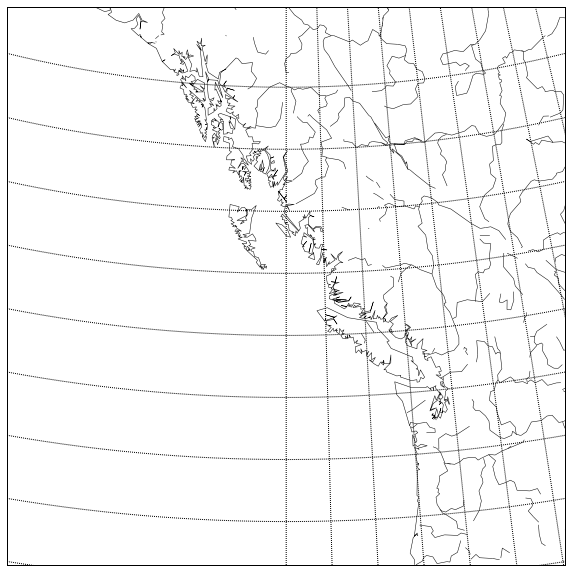

In [3]:
# get unique stations and map them

# map:
width = 2000000; 
height=4500000
lon_0 = -130; lat_0 = 51.6
plt.figure(figsize=(10,10))
m = Basemap(width=width,height=width,projection='aeqd', resolution='i',
            lat_0=lat_0,lon_0=lon_0)
# fill background.
m.drawmapboundary()
# draw coasts and fill continents.
m.drawcoastlines(linewidth=0.5)
m.drawrivers()
#m.shadedrelief()
# 20 degree graticule.
m.drawparallels(np.arange(40,60,2))
m.drawmeridians(np.arange(-130,-110,2))


#xpt, ypt = m(-123.26137, 52.07197)
#xpt2, ypt2 = m(lon_0+.04, lat_0)
#m.plot([xpt],[ypt],'ko')
#plt.text(xpt2,ypt2,'station',fontsize=12,fontweight='bold',
#                    ha='left',va='center',color='k')

In [1]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

In [2]:
# read in etopo5 topography/bathymetry.
url = 'http://ferret.pmel.noaa.gov/thredds/dodsC/data/PMEL/etopo5.nc'
etopodata = Dataset(url)

topoin = etopodata.variables['ROSE'][:]
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
# shift data so lons go from -180 to 180 instead of 20 to 380.
topoin,lons = shiftgrid(180.,topoin,lons,start=False)

%matplotlib inline
# plot topography/bathymetry as an image.

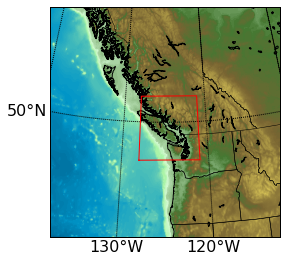

In [3]:
plt.figure(figsize=(5,5))
width = 2000000; 
height=2000000
lon_0 = -125; lat_0 = 50.0
            
            
# create the figure and axes instances.
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(width=width,height=width,projection='aeqd', resolution='i',
            lat_0=lat_0,lon_0=lon_0,ax=ax)
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
im = m.imshow(topodat,cm.GMT_relief,clim=(-8000, 8000))
# draw coastlines and political boundaries.
m.drawcoastlines()
m.drawcountries()
m.drawstates()
# draw parallels and meridians.
# label on left and bottom of map.
parallels = np.arange(30.,70.,10.)
m.drawparallels(parallels,labels=[1,0,0,1],size=16)
meridians = np.arange(-150.,-80.,10.)
m.drawmeridians(meridians,labels=[0,0,0,1],size=16)
lonmin=-128
lonmax=-121
latmin=47
latmax=52
m.plot((lonmin,lonmax,lonmax,lonmin,lonmin),(latmin,latmin,latmax,latmax,latmin),'r-',latlon=True)
# add colorbar
#cb = m.colorbar(im,"right", size="5%", pad='2%')
#ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
#plt.show()
fig.savefig('/home/eolson/pyCode/notebooks/figs/mapLarge.png')

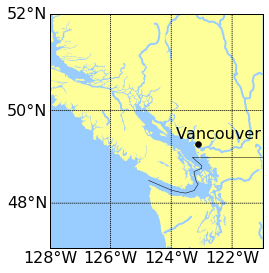

In [4]:

fig=plt.figure(figsize=(4.2,4.2))
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# fill background.
m.drawmapboundary(fill_color=(.6,.8,1))
m.fillcontinents(color=(1,1,.6),lake_color=(.6,.8,1))
# draw coasts and fill continents.
#m.drawcoastlines(linewidth=0.5)
m.drawrivers(color=(.6,.8,1),linewidth=2)
#m.shadedrelief()
# 20 degree graticule.
m.drawparallels(np.arange(int(latmin)+1,int(latmax)+1,2),labels=[1,0,0,1],size=16)
m.drawmeridians(np.arange(int(lonmin),int(lonmax)+1,2),labels=[1,0,0,1],size=16)
m.drawcountries()
m.drawstates()
m.plot(-123.1207,49.2827,'ko',latlon=True)
x,y = m(-123.85, 49.4)
plt.text(x,y,'Vancouver',size=16)
fig.savefig('/home/eolson/pyCode/notebooks/figs/mapInset.png')

/home/eolson/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in log10


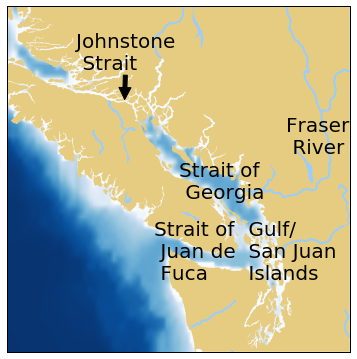

In [12]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
# setup of basemap ('lcc' = lambert conformal conic).
# use major and minor sphere radii from WGS84 ellipsoid.
m = Basemap(projection='merc',llcrnrlat=latmin,urcrnrlat=latmax-.4,\
            llcrnrlon=lonmin,urcrnrlon=lonmax,resolution='h')
# transform to nx x ny regularly spaced 5km native projection grid
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)
# plot image over map with imshow.
topo2=np.where(topodat<0,np.log10(-topodat+10),np.log10(10))
im = m.imshow(topo2,cmap='Blues',clim=(np.log10(10), np.log10(3000)))#
# draw coastlines and political boundaries.
#m.drawcoastlines()
# draw parallels and meridians.
# label on left and bottom of map.
#parallels = np.arange(30.,70.,10.)
#m.drawparallels(parallels,labels=[1,0,0,1],size=16)
#meridians = np.arange(-150.,-80.,10.)
#m.drawmeridians(meridians,labels=[0,0,0,1],size=16)
m.fillcontinents(color=(.9,.8,.5),lake_color=(.6,.8,1))
m.drawrivers(color=(.6,.8,1),linewidth=2)
x,y = m(-122.3, 49.7)
plt.text(x,y,'Fraser\n River',size=20)
x,y = m(-125.0, 48.0)
plt.text(x,y,'Strait of\n Juan de\n Fuca',size=20)
x,y = m(-124.5, 49.1)
plt.text(x,y,'Strait of\n Georgia',size=20)
x,y = m(-123.2, 48.0)
plt.text(x,y,' Gulf/\n San Juan\n Islands',size=20)
x,y = m(-125.6, 50.4)
xt,yt=m(-126.6,50.8)
ax.annotate('Johnstone\n Strait', xy=(x, y), xytext=(xt, yt), size=20,
            arrowprops=dict(facecolor='black'))#, shrink=0.05

# add colorbar
#cb = m.colorbar(im,"right", size="5%", pad='2%')
#ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')
#plt.show()

fig.savefig('/home/eolson/pyCode/notebooks/figs/mapLabeled.png')